In [1]:
%matplotlib notebook

In [2]:
%load_ext autoreload

%autoreload 2

In [17]:
pip install -U scikit-multiflow

Requirement already up-to-date: scikit-multiflow in /Users/venoligamage/Documents/FYP/Implementation/Asips/scikit-multiflow/src (0.6.dev0)
Note: you may need to restart the kernel to use updated packages.


# Preprocessing

In [88]:
import pandas as pd
import numpy as np

In [5]:
dataset = pd.read_csv('pulsar_data_train.csv')

In [6]:
from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values = "NaN", strategy = "mean")

In [7]:
imputer = SimpleImputer(strategy="most_frequent")
print(imputer.fit_transform(dataset))

[[ 1.21156250e+02  4.83729711e+01  3.75484665e-01 ...  7.44987415e+00
   6.51592977e+01  0.00000000e+00]
 [ 7.69687500e+01  3.61755566e+01  7.12897860e-01 ...  9.41465226e+00
   1.02722975e+02  0.00000000e+00]
 [ 1.30585938e+02  5.32295335e+01  1.33408289e-01 ...  8.50836378e+00
   7.40313242e+01  0.00000000e+00]
 ...
 [ 1.16031250e+02  4.32138464e+01  6.63455691e-01 ...  1.70552145e+01
   3.12204325e+02  0.00000000e+00]
 [ 1.35664062e+02  4.99337494e+01 -8.99403060e-02 ...  7.39839490e+00
   6.23340175e+01  0.00000000e+00]
 [ 1.20726562e+02  5.04722564e+01  3.46178079e-01 ...  1.76622219e+01
   3.29548016e+02  0.00000000e+00]]


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\impute\_base.py:356: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  row_mask = np.logical_not(row_mask).astype(np.bool)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\impute\_base.py:356: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  row_mask = np.logical_not(row_mask).astype(np.bool)
C:\Users\del

## Training Data

In [3]:
#Alrady tested. fast,not incrimently learn, not solve imbalance problem
from skmultiflow.data import FileStream

# 1. Create a stream

stream = FileStream('pulsar_data_train.csv')
#(./name)
print("Features:")
print(stream.feature_names)
print("Number of Targets: " + str(stream.n_targets)+"\nName: "+str(stream.target_names))
print("Target class values: " + str(stream.target_values))


Features:
['Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve']
Number of Targets: 1
Name: ['target_class']
Target class values: [0, 1]


In [91]:
dataset = pd.read_csv('pulsar_data_train.csv')
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,120.976562,36.106930,0.402739,1.542150,2.834448,16.725834,8.453452,86.515538,0
1,15.882812,29.729410,7.268593,53.241153,112.418060,67.234533,0.467520,-0.491604,1
2,99.343750,42.259880,0.265018,1.142023,2.857023,20.529580,8.799714,84.441675,0
3,140.171875,49.381821,0.161292,-0.381706,2.427258,14.416890,8.883863,106.498687,0
4,118.398438,44.387382,0.298337,0.695043,2.678094,22.323463,8.823092,79.807695,0


## Testing Results

In [92]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
import numpy as np
def evaluationMesures(y_true_all, y_pred_all): 
  tn, fp, fn, tp = confusion_matrix(y_true_all,y_pred_all).ravel()
  recall = recall_score(y_true_all, y_pred_all)
  precision = precision_score(y_true_all, y_pred_all)
  accuracy = accuracy_score(y_true_all, y_pred_all)
  f1 = f1_score(y_true_all, y_pred_all)
  specificity = tn/(tn + fp)
  G_mean = np.sqrt((precision * specificity))
  kappa = cohen_kappa_score(y_true_all, y_pred_all)

  print('Accuracy: {0} \nRecall: {1} \nPrecision: {2} \nF1 Score: {3} \nSpecificity(TNR): {4} \nG-Mean: {5} \nKappa: {6}'
      .format(accuracy,recall,precision,f1,specificity,G_mean,kappa))
  
  print(tn)
  print(fp)
  print(fn)
  print(tp)


## GH-EFDT

In [93]:
import datetime
from skmultiflow.trees import ExtremelyFastDecisionTreeClassifier
#fast(not much as ht),incremantly learn, not slove imbalance problem 
import numpy as np
#from skmultiflow.trees.split_criterion import GiniSplitCriterion
from skmultiflow.data import DataStream
stream = DataStream(dataset)

efdtgh = ExtremelyFastDecisionTreeClassifier(split_criterion='gaussian_hellinger')


print("info: ")
print(efdtgh.get_info)
# Setup variables to control loop and track performance
n_samples = 0
max_samples = 20000
y_true_all = []
y_pred_all = []
predict_proba =[]
start_time = datetime.datetime.now()
# Train the estimator with the samples provided by the data stream
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    y_pred = efdtgh.predict(X)
    y_true_all.append(y[0])
    y_pred_all.append(y_pred[0])
    predict_proba.append(efdtgh.predict_proba(X))
    efdtgh.partial_fit(X, y)
    n_samples += 1
    
    
end_time = datetime.datetime.now()
time_difference = end_time - start_time
print('{} samples analyzed.'.format(n_samples))
print('{} Time difference'.format(time_difference))
print("info: ")
print(efdtgh.get_info)

info: 
<bound method BaseSKMObject.get_info of ExtremelyFastDecisionTreeClassifier(binary_split=False, grace_period=200,
                                    leaf_prediction='nba',
                                    max_byte_size=33554432,
                                    memory_estimate_period=1000000,
                                    min_samples_reevaluate=20, nb_threshold=0,
                                    nominal_attributes=None,
                                    split_confidence=1e-07,
                                    split_criterion='gaussian_hellinger',
                                    stop_mem_management=False,
                                    tie_threshold=0.05)>
9273 samples analyzed.
0:02:00.804481 Time difference
info: 
<bound method BaseSKMObject.get_info of ExtremelyFastDecisionTreeClassifier(binary_split=False, grace_period=200,
                                    leaf_prediction='nba',
                                    max_byte_size=33554432,
    

In [96]:
evaluationMesures(y_true_all,y_pred_all)

Accuracy: 0.9696969696969697 
Recall: 0.7694117647058824 
Precision: 0.8849797023004059 
F1 Score: 0.8231592196349905 
Specificity(TNR): 0.9899085836400332 
G-Mean: 0.9359748947778316 
Kappa: 0.8066762933582283
8338
85
196
654


In [97]:
prob_list=[]
for x in predict_proba:
    print(x[0][0])
    prob_list.append(x[0][0])
    

0
0.0
0.0
1.0
1.0
1.0
1.0
0.9999999867281341
0.9999999998088028
0.999999999468282
4.076461902218116e-18
0.8181818181818182
0.8333333333333334
0.8461538461538461
0.8571428571428571
0.9999999998490952
0.9999974635165101
0.9999999999961952
0.9999999902368407
0.9999999842185308
0.9999999761040175
2.812387737053957e-32
0.8181818181818182
0.8260869565217391
0.8333333333333334
0.84
0.8461538461538461
0.8518518518518519
0.8571428571428571
0.9999999005420472
1.1895897439901518e-39
0.8387096774193549
0.84375
0.8484848484848485
0.9999994828429636
0.9999947891714683
0.9999307332247692
0.9951065528121422
2.0142176198147073e-242
0.9999916540672559
0.9999983475938834
3.3432565293696435e-242
0.0
0.9999985110024645
0.9999999648112875
0.9999999816133834
2.432320824747222e-09
0.9999975710877166
0.0
0.9999999974961209
1.0
0.9999998553096575
0.9999999999864286
0.9999999999999982
2.930315380011427e-17
0.9999996686303646
0.9999999938921268
0.9996627226164116
0.999999778055742
0.9999988526379506
0.99999995709

0.9940868020595595
1.0
0.9940955306335837
0.9941042334767906
0.9941129107027901
0.9941215624245238
0.9941301887542707
0.9941387898036518
0.9941473656836344
0.9941559165045377
0.9515495646076718
0.9517294667884962
0.994164442376037
1.0
0.008007234541437038
0.9519080379156499
0.9941729434071683
1.0
0.9941814197063337
0.9520852927069132
0.9941898713813048
1.0
0.9941982985392283
0.9942067012866304
0.9942150797294205
0.9942234339728966
0.9942317641217492
1.0
0.9942400702800659
0.007951205847260953
0.9942483525513355
0.0
0.9942566110384523
1.0
0.9942648458437208
1.0
0.9942730570688594
0.007895955799268021
0.9942812448150048
0.9942894091827162
0.9827099546024859
0.9930485543467729
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.00784146827787691
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.007787727605401666
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.00773471853101

0.9999997912222709
1.0
1.0
1.0
1.0
1.0
0.9999999999999716
1.0
0.017475680559487256
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.1195951615413048
1.0
0.017416423509250968
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.7264920765015032
1.0
1.0
1.0
1.0
1.0
0.9999869386761305
1.0
0.9999966119262229
0.9999999999999925
1.0
0.9999990842972089
0.017357566962065318
0.9997814554002243
1.0
1.0
1.0
0.9999999988785001
1.0
0.01729910687126096
0.9983630656409107
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999752338750453
1.0
0.9999996605172956
1.0
0.9613995515802275
1.0
1.0
0.017241039244502102
1.0
1.0
1.0
1.0
0.017183360142877656
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.017126065680010558
1.0
1.0
1.424732648048211e-10
1.0
1.0
9.012815205765656e-05
0.9925275049675946
1.0
0.9125085558743447
0.9997275922403246
1.0
1.0
0.978964391706196
0.01706915202118487
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.01701261538249022
1

1.0
0.982577279759045
1.0
0.9826093701068045
1.0
0.853451680337721
0.9999689371384605
1.0
1.0
1.0
0.9781014773485975
1.0
1.0
1.0
1.0
1.0
0.9781963428095671
1.0
0.0023929259708548064
1.0
1.0
1.0
0.9826413424595375
0.9826731974668448
1.0
1.0
0.07073995207767493
0.9827049357735674
0.9827365580198305
1.0
0.982768064841086
1.0
1.0
0.9827994568681554
0.9828307347272718
0.9810467769393988
0.002382236450659077
1.0
0.03730501946683821
1.0
1.0
1.0
0.9810811170220132
0.9811153328926615
0.9811494252240602
1.0
0.9782903898922459
1.0
0.9811833946840769
0.9812172419357733
1.0
0.9943799643051744
1.0
9.830145268414295e-07
1.0
0.9783836291410395
1.0
0.9812509676374493
0.9784760709199819
0.9812845724426851
1.0
0.9813180570003832
1.0
0.06963710120675297
1.0
0.9813514219548107
0.9813846679456404
0.9814177956079917
0.0023716420087672115
1.0
1.0
0.9814508055724709
1.0
1.0
1.0
1.0
0.9814836984652116
0.002361141382279811
1.0
0.07249984910398191
1.0
1.0
1.0
0.9815164749079135
1.0
0.9815491355178828
5.2110993117

In [98]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_true = y_true_all, y_score=prob_list, pos_label=1.0)
print(fpr)

print(tpr)

print(thresholds)

[0.         0.72254541 0.72290158 0.7230203  0.72325775 0.72337647
 0.72361391 0.72456369 0.72456369 0.72646326 0.72646326 0.72812537
 0.72812537 0.72824409 0.72824409 0.72848154 0.72848154 0.73726701
 0.73726701 0.7414223  0.7414223  0.7424908  0.7424908  0.74640864
 0.74640864 0.74700226 0.74700226 0.75281966 0.75281966 0.75697495
 0.75697495 0.75792473 0.75792473 0.75851834 0.75851834 0.75899323
 0.75899323 0.75958685 0.75958685 0.76124896 0.76124896 0.76682892
 0.76682892 0.76694764 0.76694764 0.76872848 0.76872848 0.77003443
 0.77003443 0.77074676 0.77074676 0.7725276  0.7725276  0.77430844
 0.77430844 0.7788199  0.7788199  0.78131307 0.78131307 0.78333135
 0.78333135 0.79544105 0.79544105 0.80078357 0.80078357 0.80695714
 0.80695714 0.80873798 0.80873798 0.81301199 0.81301199 0.81894812
 0.81894812 0.82013534 0.82013534 0.82239107 0.82239107 0.82880209
 0.82880209 0.83105782 0.83105782 0.83450077 0.83450077 0.84269263
 0.84269263 0.84637303 0.84637303 0.85717678 0.85717678 0.8614

<IPython.core.display.Javascript object>


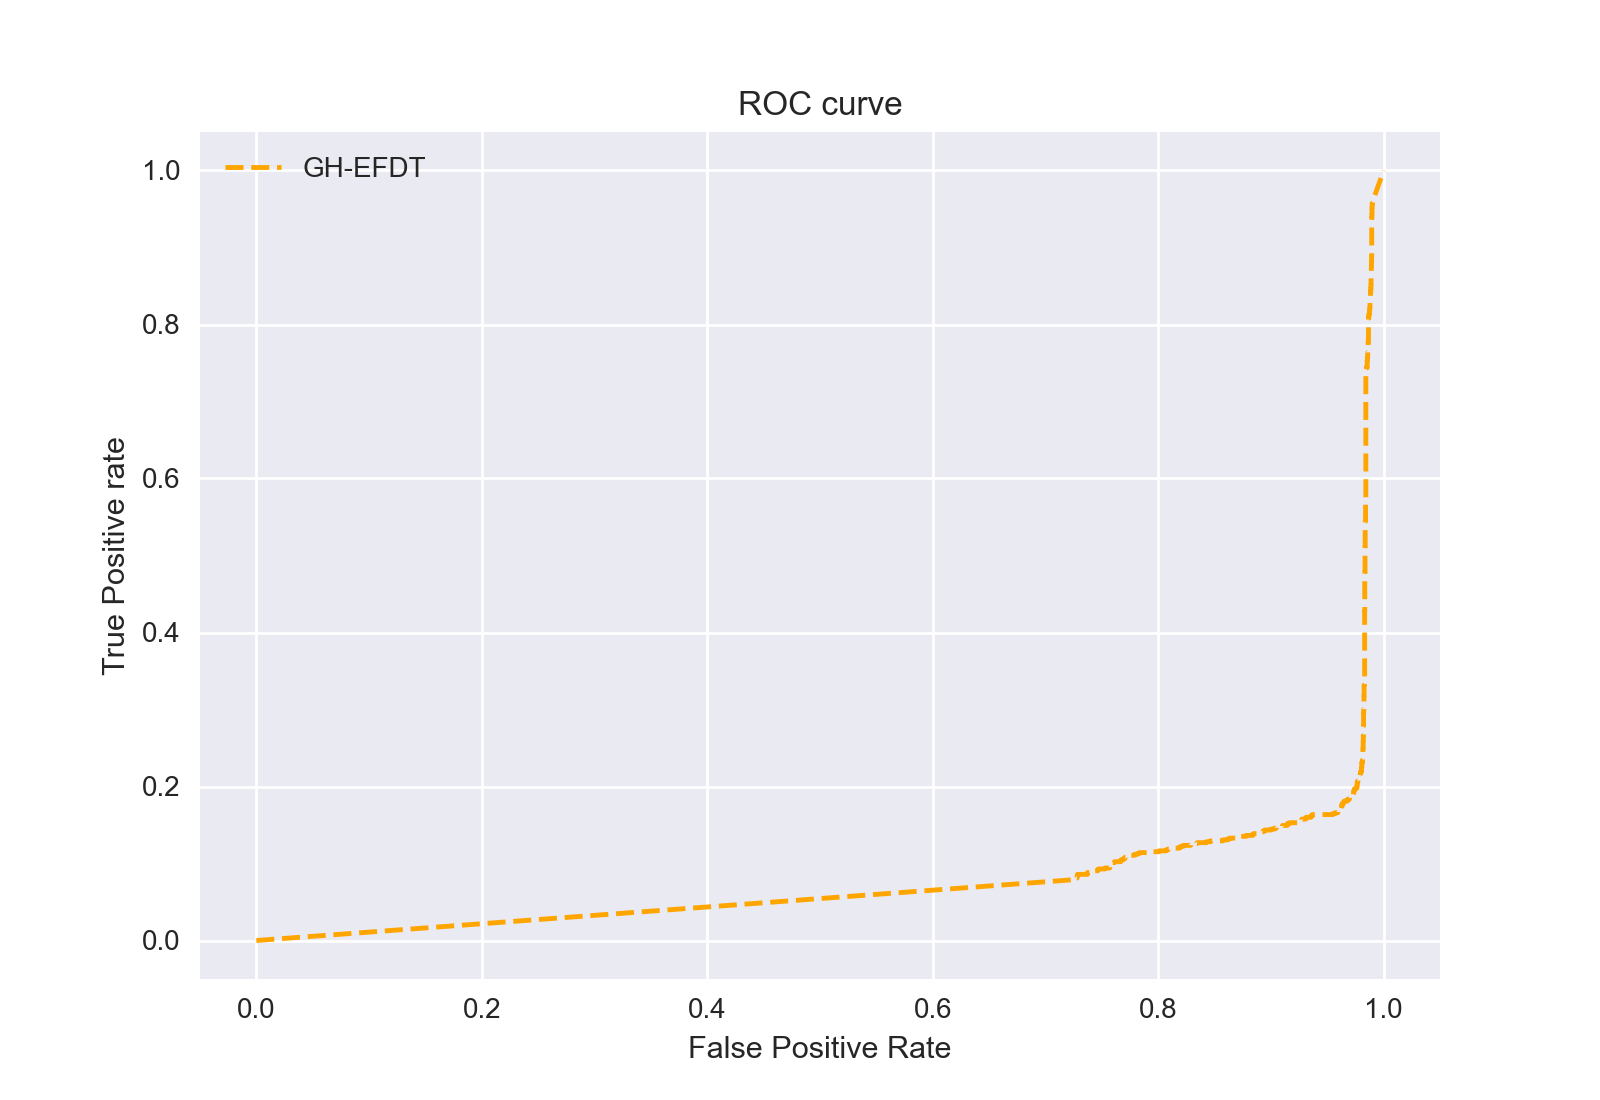

In [99]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='GH-EFDT')
# title
plt.title('ROC curve')
# x labelz
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## GH-VFDT

In [9]:
import datetime
from skmultiflow.trees import HoeffdingTreeClassifier
#fast(not much as ht),incremantly learn, not slove imbalance problem 
import numpy as np
#from skmultiflow.trees.split_criterion import GiniSplitCriterion
from skmultiflow.data import FileStream
stream = FileStream('pulsar_data_train.csv')

model = HoeffdingTreeClassifier(split_criterion='gaussian_hellinger')


print("info: ")
print(model.get_info)
# Setup variables to control loop and track performance
n_samples = 0
max_samples = 20000
y_true_all = []
y_pred_all = []

start_time = datetime.datetime.now()
# Train the estimator with the samples provided by the data stream
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    y_pred = model.predict(X)
    y_true_all.append(y[0])
    y_pred_all.append(y_pred[0])
    model.partial_fit(X, y)
    n_samples += 1
    
    
end_time = datetime.datetime.now()
time_difference = end_time - start_time
print('{} samples analyzed.'.format(n_samples))
print('{} Time difference'.format(time_difference))
print("info: ")
print(model.get_info)

info: 
<bound method BaseSKMObject.get_info of HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                        leaf_prediction='nba', max_byte_size=33554432,
                        memory_estimate_period=1000000, nb_threshold=0,
                        no_preprune=False, nominal_attributes=None,
                        remove_poor_atts=False, split_confidence=1e-07,
                        split_criterion='gaussian_hellinger',
                        stop_mem_management=False, tie_threshold=0.05)>
9273 samples analyzed.
0:00:00.986833 Time difference
info: 
<bound method BaseSKMObject.get_info of HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                        leaf_prediction='nba', max_byte_size=33554432,
                        memory_estimate_period=1000000, nb_threshold=0,
                        no_preprune=False, nominal_attributes=None,
                        remove_poor_atts=False, split_confidence=1e-07,
                        spli

In [10]:
evaluationMesures(y_true_all,y_pred_all)

Accuracy: 0.9583737733203925 
Recall: 0.7741176470588236 
Precision: 0.7723004694835681 
F1 Score: 0.7732079905992949 
Specificity(TNR): 0.9769678261901935 
G-Mean: 0.8686269111862857 
Kappa: 0.7502918535094207
8229
194
192
658


## OnlineSMOTEBaggingClassifier

In [11]:
import datetime
from skmultiflow.meta import OnlineSMOTEBaggingClassifier
#fast(not much as ht),incremantly learn, not slove imbalance problem 
import numpy as np
#from skmultiflow.trees.split_criterion import GiniSplitCriterion
from skmultiflow.data import FileStream
stream = FileStream('pulsar_data_train.csv')

model = OnlineSMOTEBaggingClassifier()


print("info: ")
print(model.get_info)
# Setup variables to control loop and track performance
n_samples = 0
max_samples = 20000
y_true_all = []
y_pred_all = []

start_time = datetime.datetime.now()
# Train the estimator with the samples provided by the data stream
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    y_pred = model.predict(X)
    y_true_all.append(y[0])
    y_pred_all.append(y_pred[0])
    model.partial_fit(X, y,np.array([0,1]))
    n_samples += 1
    
    
end_time = datetime.datetime.now()
time_difference = end_time - start_time
print('{} samples analyzed.'.format(n_samples))
print('{} Time difference'.format(time_difference))
print("info: ")
print(model.get_info)

info: 
<bound method BaseSKMObject.get_info of OnlineSMOTEBaggingClassifier(base_estimator=KNNADWINClassifier(leaf_size=30,
                                                               max_window_size=1000,
                                                               metric='euclidean',
                                                               n_neighbors=5),
                             drift_detection=True, n_estimators=10,
                             random_state=None, sampling_rate=1)>
9273 samples analyzed.
0:01:51.200809 Time difference
info: 
<bound method BaseSKMObject.get_info of OnlineSMOTEBaggingClassifier(base_estimator=KNNADWINClassifier(leaf_size=30,
                                                               max_window_size=1000,
                                                               metric='euclidean',
                                                               n_neighbors=5),
                             drift_detection=True, n_estimators=10,
  

In [23]:
evaluationMesures(y_true_all,y_pred_all)

Accuracy: 0.9681872101800928 
Recall: 0.7035294117647058 
Precision: 0.9329173166926678 
F1 Score: 0.8021462105969148 
Specificity(TNR): 0.9948949305473109 
G-Mean: 0.9634078622252028


In [12]:
evaluationMesures(y_true_all,y_pred_all)

Accuracy: 0.9687264100075488 
Recall: 0.7070588235294117 
Precision: 0.9361370716510904 
F1 Score: 0.8056300268096515 
Specificity(TNR): 0.9951323756381337 
G-Mean: 0.9651840798702989 
Kappa: 0.7889840140189248
8382
41
249
601


## OnlineUnderOverBaggingClassifier

In [18]:
import datetime
from skmultiflow.meta import OnlineUnderOverBaggingClassifier
import numpy as np
from skmultiflow.data import FileStream
stream = FileStream('pulsar_data_train.csv')

model = OnlineUnderOverBaggingClassifier()


print("info: ")
print(model.get_info)
# Setup variables to control loop and track performance
n_samples = 0
max_samples = 20000
y_true_all = []
y_pred_all = []
wait_samples = 300

start_time = datetime.datetime.now()
# Train the estimator with the samples provided by the data stream
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    y_pred = model.predict(X)
#     if (n_samples > wait_samples):
    y_true_all.append(y[0])
    y_pred_all.append(y_pred[0])
    model.partial_fit(X, y,np.array([0,1]))
    n_samples += 1
    
    
end_time = datetime.datetime.now()
time_difference = end_time - start_time
print('{} samples analyzed.'.format(n_samples))
print('{} Time difference'.format(time_difference))
print("info: ")
print(model.get_info)

info: 
<bound method BaseSKMObject.get_info of OnlineUnderOverBaggingClassifier(base_estimator=KNNADWINClassifier(leaf_size=30,
                                                                   max_window_size=1000,
                                                                   metric='euclidean',
                                                                   n_neighbors=5),
                                 drift_detection=True, n_estimators=10,
                                 random_state=None, sampling_rate=2)>
9273 samples analyzed.
0:01:22.163335 Time difference
info: 
<bound method BaseSKMObject.get_info of OnlineUnderOverBaggingClassifier(base_estimator=KNNADWINClassifier(leaf_size=30,
                                                                   max_window_size=1000,
                                                                   metric='euclidean',
                                                                   n_neighbors=5),
                              

In [25]:
evaluationMesures(y_true_all,y_pred_all)

Accuracy: 0.9692656098350049 
Recall: 0.7941176470588235 
Precision: 0.8598726114649682 
F1 Score: 0.8256880733944956 
Specificity(TNR): 0.9869405200047489 
G-Mean: 0.9212182815690736


In [14]:
evaluationMesures(y_true_all,y_pred_all)

Accuracy: 0.970344009489917 
Recall: 0.7870588235294118 
Precision: 0.8768020969855832 
F1 Score: 0.8295102293862368 
Specificity(TNR): 0.9888400807313309 
G-Mean: 0.9311375066920161 
Kappa: 0.8133214848426262
8329
94
181
669
